### Homework 04 - Programming and critical analysis (ist1102082, ist1103252)

### Exercise 1

Loading the data from the column_diagnosis.arf file

In [33]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score
from sklearn import metrics
from scipy.io.arff import loadarff


warnings.filterwarnings('ignore')

# Load the data
data = loadarff('./column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()
X = df.drop('class', axis=1)
y = df['class']

print(X)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  
0        98.672917                 -0.254400  
1    

In [34]:

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Define a list of k values to try
k_values = [2, 3, 4, 5]

# Initialize lists to store silhouette scores and purity scores for each k
silhouette_scores = []
purity_scores = []

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

# Apply k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_normalized)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette = silhouette_score(X_normalized, cluster_labels)
    silhouette_scores.append(silhouette)
    
    # Calculate purity score (completeness score since we have ground truth labels)
    purity = purity_score(y, cluster_labels)
    purity_scores.append(purity)

# Print the results
for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}: Silhouette Score = {silhouette:.4f}, Purity Score = {purity:.4f}')


K=2: Silhouette Score = 0.3604, Purity Score = 0.6323
K=3: Silhouette Score = 0.2958, Purity Score = 0.6677
K=4: Silhouette Score = 0.2744, Purity Score = 0.6613
K=5: Silhouette Score = 0.2382, Purity Score = 0.6774


### Exercise 2

In [35]:
from sklearn.decomposition import PCA

# Fit a PCA model on the normalized data
pca = PCA(n_components=2)
pca.fit(X_normalized)  

# i. Variability explained by top two principal components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for Top Two Principal Components:")
print(f"Component 1: {explained_variance[0]:.4f}")
print(f"Component 2: {explained_variance[1]:.4f}")

# ii. Sort input variables by relevance in top two principal components
# Extract the weights of the input variables for the top two components
component_weights = pca.components_
print("\nComponent Loadings:")
print(f"Component 1: {component_weights[0]}")
print(f"Component 2: {component_weights[1]}")

# Sort input variables by absolute loading for component 1
sorted_variables_component1 = [X.columns[i] for i in
                                np.argsort(np.abs(component_weights[0]))[::-1]]

# Sort input variables by absolute loading for component 2
sorted_variables_component2 = [X.columns[i] for i in
                                np.argsort(np.abs(component_weights[1]))[::-1]]


# Print the sorted input variables for each component
print("\nTop Two Principal Components:")
print(f"Top Two Variables for Component 1: {sorted_variables_component1[:2]}")
print(f"Top Two Variables for Component 2: {sorted_variables_component2[:2]}")


Explained Variance for Top Two Principal Components:
Component 1: 0.5618
Component 2: 0.2096

Component Loadings:
Component 1: [ 0.59162062  0.46703944  0.51508476  0.32568886 -0.11582398  0.21692963]
Component 2: [ 0.10003707 -0.67037276  0.08004745  0.44330299 -0.58107384  0.00458291]

Top Two Principal Components:
Top Two Variables for Component 1: ['pelvic_incidence', 'lumbar_lordosis_angle']
Top Two Variables for Component 2: ['pelvic_tilt', 'pelvic_radius']


### Exercise 3

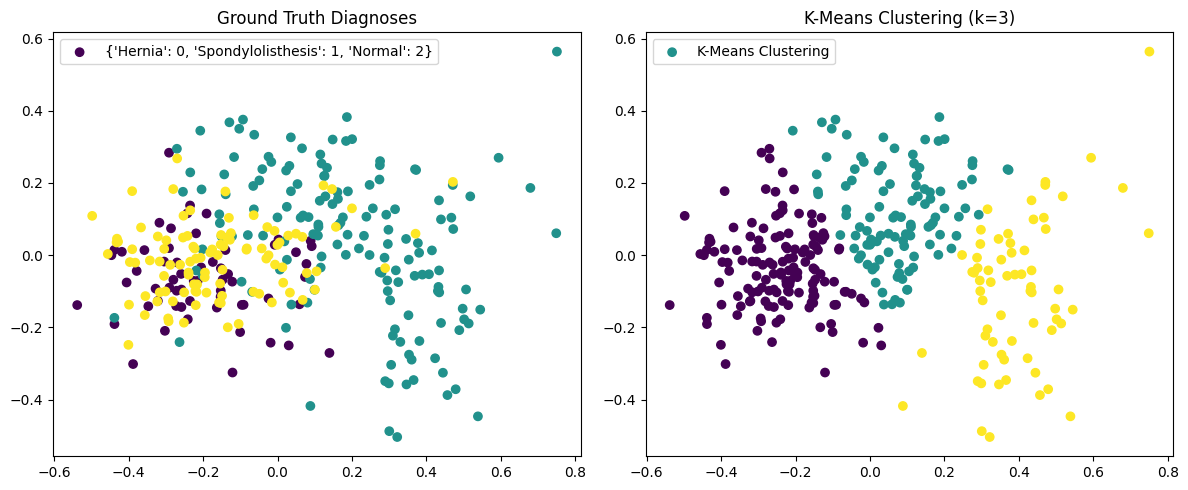

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Fit a PCA model on the normalized data with 2 components
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_normalized)

# K-means clustering labels with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit(X_normalized)

# Map diagnoses to 0, 1, 2
codes = {'Hernia': 0, 'Spondylolisthesis': 1, 'Normal': 2}
codes_labels = y.map(codes).tolist()

# Create a scatter plot for ground truth labels
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=codes_labels, label=codes)
plt.title("Ground Truth Diagnoses")
plt.legend()

# Create a scatter plot for K-means clustering labels
plt.subplot(122)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=kmeans.labels_, label='K-Means Clustering')
plt.title("K-Means Clustering (k=3)")
plt.legend()

plt.tight_layout()
plt.show()


### Exercise 4

Considering the results from question (1) and question (3), clustering can be used to characterize the population of ill and healthy individuals in the following ways:

1. Identifying Subpopulations:
   - Clustering, as demonstrated in question (1), can help identify subpopulations within the dataset based on the similarities of their feature profiles. In the context of the column_diagnosis dataset, these subpopulations could represent different groups of individuals with varying degrees of spinal health or illness.

2. Validation and Assessment:
   - By comparing the clustering results with the ground truth labels (diagnoses), as shown in question (3), you can assess the effectiveness of clustering in distinguishing between ill and healthy individuals. This provides a way to validate the clustering results and understand how well they characterize the population.

In summary, clustering allows you to segment the population into distinct groups based on feature similarity, and then you can evaluate the relevance and accuracy of these clusters by comparing them to known information about health status (diagnoses). This can help in characterizing and understanding the diversity within the population of individuals with respect to their health status.